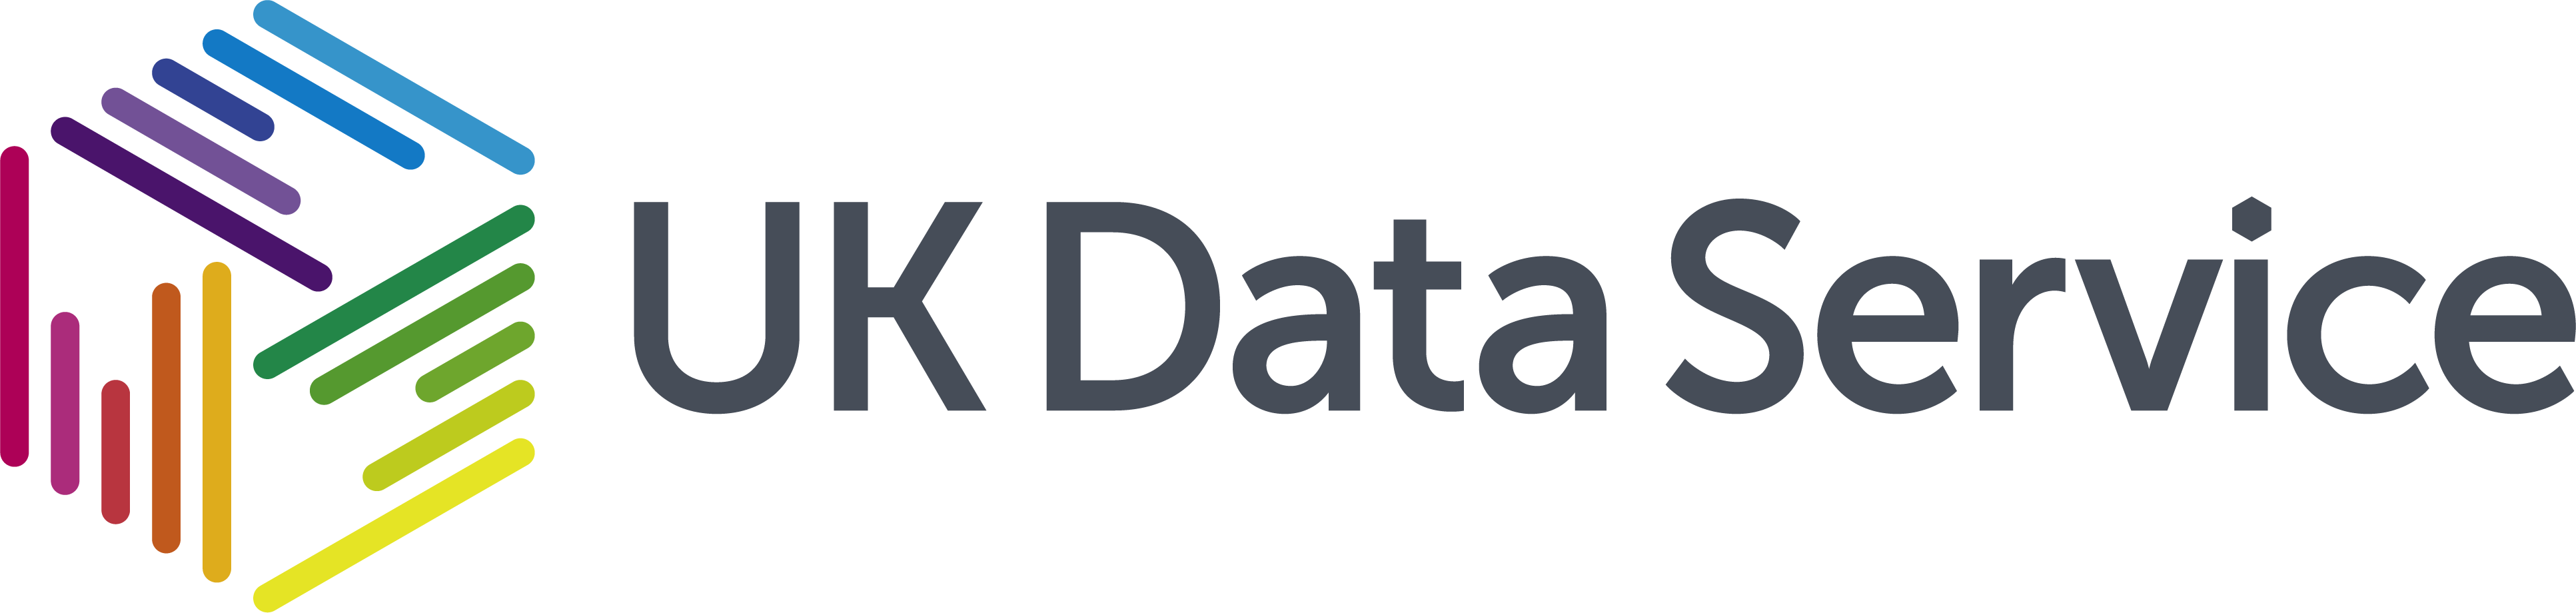

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-notebook-involves..." data-toc-modified-id="This-notebook-involves...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This notebook involves...</a></span></li><li><span><a href="#The-dataset..." data-toc-modified-id="The-dataset...-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The dataset...</a></span></li><li><span><a href="#Import-required-modules" data-toc-modified-id="Import-required-modules-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import required modules</a></span></li><li><span><a href="#Webscraping-and-APIs..." data-toc-modified-id="Webscraping-and-APIs...-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Webscraping and APIs...</a></span></li><li><span><a href="#Retrieval---Womens-Super-League" data-toc-modified-id="Retrieval---Womens-Super-League-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Retrieval - Womens Super League</a></span><ul class="toc-item"><li><span><a href="#NewsAPI---initialisation" data-toc-modified-id="NewsAPI---initialisation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>NewsAPI - initialisation</a></span></li><li><span><a href="#Grab-your-API-key" data-toc-modified-id="Grab-your-API-key-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Grab your API key</a></span></li><li><span><a href="#get_everything()-method" data-toc-modified-id="get_everything()-method-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>get_everything() method</a></span></li><li><span><a href="#Results---JSON-object" data-toc-modified-id="Results---JSON-object-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Results - JSON object</a></span></li><li><span><a href="#Building-a-pandas-DataFrame" data-toc-modified-id="Building-a-pandas-DataFrame-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Building a pandas DataFrame</a></span></li></ul></li><li><span><a href="#Webscraping" data-toc-modified-id="Webscraping-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Webscraping</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RegEx</a></span><ul class="toc-item"><li><span><a href="#Date---data-processing" data-toc-modified-id="Date---data-processing-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Date - data processing</a></span></li><li><span><a href="#Quotes---data-extraction" data-toc-modified-id="Quotes---data-extraction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Quotes - data extraction</a></span></li></ul></li><li><span><a href="#Data-retrieval---Mens-Premier-League" data-toc-modified-id="Data-retrieval---Mens-Premier-League-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data retrieval - Mens Premier League</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>RegEx</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Quotes" data-toc-modified-id="Quotes-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Quotes</a></span></li></ul></li><li><span><a href="#Save-datasets-to-CSV-file" data-toc-modified-id="Save-datasets-to-CSV-file-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Save datasets to CSV file</a></span><ul class="toc-item"><li><span><a href="#Women's-football" data-toc-modified-id="Women's-football-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Women's football</a></span></li><li><span><a href="#Men's-football" data-toc-modified-id="Men's-football-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Men's football</a></span></li><li><span><a href="#Saving-datasets" data-toc-modified-id="Saving-datasets-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Saving datasets</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## This notebook involves...

The first basic text-mining step: data retrieval, and also includes a little bit of data processing and extraction using RegEx.

In [1]:
# API key = cd716c442d1f48408aafb24eca509e2f

## The dataset...

In this notebook, we won't be working with a pre-existing dataset, we'll be building one ourselves! We will be using an API and some webscraping to create a pandas DataFrame containing our online articles, and the text content that we wish to do some text-mining with. If that sounds weird, fear not, I'll explain as we go along.

Below I've commented out some code that I no longer need, as I have already installed these packages.
Go ahead and uncomment this code and make sure you install each one before you begin.

In [2]:

# !pip install pandas
# !pip install newsapi-python
# !pip install datetime
# !pip install requests
# !pip install bs4

## Import required modules

The first package 'newsapi' requires you to go to the following link https://newsapi.org/ and create a free account. You can then generate your API key, which you will need to locate your news articles.

In [3]:
import nltk
from nltk import word_tokenize
 # nltk stands for natural language tool kit and is useful for text-mining

from newsapi import NewsApiClient
# NewsAPI package allows us to use their API which returns search results for news articles

import pandas as pd
# includes useful functions for manipulating data 

import re
# re is for regular expressions, which we use later 

import datetime as dt
# supplies classes for manipulating dates and times

import requests
# allows us to send HTTP requests using Python - we will need this for webscraping!

from bs4 import BeautifulSoup
# contains functions that help us pull content from webpages and save that info into something more readable
# ...again, important for webscraping!

## Webscraping and APIs...

Webscraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful, perhaps a spreadsheet. Of course, we could just copy and paste this information manually into a spreadsheet, but that's time-consuming and unreasonable if we want to extract large amounts of data. Instead, we can use Python webscraping packages to access the information we want and display it in a logical format.

API stands for 'Application programming interface', and refers to a mechanism that allows two software components to communicate with each other using a set of definitions and protocals. Basically, it allows two applications to talk to each other. For instance, think of your Weather app on your phone, this app software "talks" to the weather bureau's software system which contains the daily weather data. The result of this conversation is daily weather updates on your phone. 

Both webscraping (as a process) and APIs (as a set of procedures and protocals) share the same goal: to access web data. The former allows you to extract data from any website via scraping software, whilst the latter gives you direct access to the data you want. In this notebook I'll be using a combination of the two.

## Retrieval - Womens Super League

Text-Mining has four basic steps: retrieval, processing, extraction, and analysis. 
During the retrieval stage we retrieve information, i.e., we gather the text data that we wish to work with. In this case, we're looking for articles that focus on women's football, and in particular, the WSL (Women's Super League). I'd also like to build up a dataset which focuses on men's football too, which looks at the Premier League. 

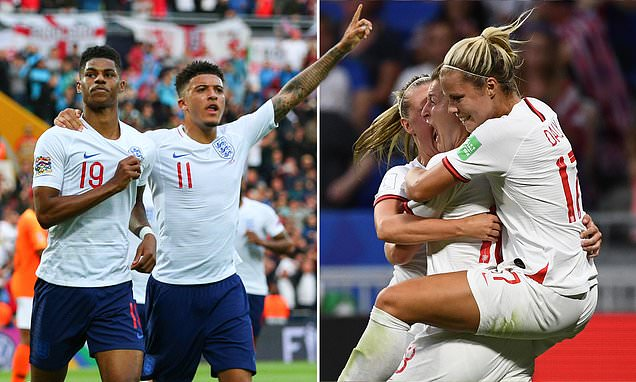

### NewsAPI - initialisation

So before I can even begin to think about webscraping, I need to locate some relevant data. I could just type "women's football WSL" into google and click on each individual link and try to scrape this data... but again, that's a) time-consuming b) uncreative. Instead, I did a brief google search "Scrape news articles Python" and came across NewsAPI. This API returns search results for current and historic news articles, and the results include information on: title, author, source, date, and url of the news article. It also allows you to input multiple terms so that you can grab as many relevant links as you can! 

Neat. Let's get started then.

### Grab your API key

In the section under 'Import required modules' I mentioned that you'll need to visit this link  https://newsapi.org/ and create a free account. So if you haven't done so, do it now! You can then generate your API key, which you will need to locate your news articles.

In [4]:
# Initialise the client class with your API key:

newsapi = NewsApiClient(api_key='cd716c442d1f48408aafb24eca509e2f')

In [5]:
# Here, I print the instance of my NewsApiClient class... it has 3 methods:
# get_top_headlines(), get_everything(), and get_sources()

newsapi

### get_everything() method

Because we don't want our search results restricted to the top headlines, we will be using the get_everything() method. 

The get_everything() method has the following parameters:

* apiKey (required)
* q - keywords or phrases to search for in the article title and body. Supports advanced search e.g. you can use the AND / OR / NOT keywords 
* sources - if you want to specify which news sources or blogs you want headlines from e.g. bbc
* from - a date and optional time for the oldest article allowed
* to - a date and optional time for the newest article allowed
* language - the language you want your articles in
* sortBy - defines how your results are returned, options include 'relevancy' so that articles most closely related to 'q' come first

NOTE: Unfortunately in the free version of the NewsAPI I can't restrict by date. So I can only pull articles from 31st October. I would have liked to specify a timeframe for women's football that corresponded to last years WSL, and the same for the men's premier league. Alas, we march onwards. 

In [6]:
# Create a variable called 'womens'
# Use get_everything() method with my topic set to include the "womens super league" and the "WSL"...
# helps to capture results that use the abbrieviation 

womens = newsapi.get_everything(q = "women super league AND WSL", language = 'en')

### Results - JSON object

Below I have printed the result for my get_everything() search, and I know what you're thinking.. ew, gross! Yep, we have a dictionary result for each article which contains the title, author, source, date of publish, and the url. But, this format isn't the best. Dictionarys are made up of key/value pairs, so what we can do is extract the relevant information and then place it into a DataFrame.

We probably want the keys as column headings and our values inserted in the rows.
 

In [7]:
# Let's take a look at our results...

womens

{'status': 'ok',
 'totalResults': 0,
 'articles': [{'title': 'Brighton Women name ex-Bayern coach Scheuer as new manager - Reuters',
   'author': None,
   'source': {'Id': 'reuters', 'Name': 'Reuters'},
   'publishedAt': '2022-12-28T13:14:00Z',
   'url': 'https://www.reuters.com/lifestyle/sports/brighton-women-name-ex-bayern-coach-scheuer-new-manager-2022-12-28/'},
  {'title': 'Aston Villa sign midfielder Nobbs from Arsenal - Reuters',
   'author': None,
   'source': {'Id': 'reuters', 'Name': 'Reuters'},
   'publishedAt': '2023-01-05T15:52:00Z',
   'url': 'https://www.reuters.com/lifestyle/sports/aston-villa-sign-midfielder-nobbs-arsenal-2023-01-05/'},
  {'title': 'Bethany England moves to Tottenham from Chelsea in WSL record deal',
   'author': 'PA Media',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2023-01-04T13:53:23Z',
   'url': 'https://www.theguardian.com/football/2023/jan/04/bethany-england-transfer-tottenham-chelsea-wsl-record-deal'},
  {'title': 'Gemm

In [8]:
# I have created 5 empty lists for our dictionary keys

headlines = []
author = []
source = []
date = []
url = []

# first I will use a for loop to interate over the 'articles' list which contains the relevant dictionary
# the get() method returns the value of the item with the specified key
for i in womens.get("articles"):
#  then I access the "title" key using get() and append the value to the empty headlines list   
    headlines.append(i.get("title"))
#     repeat for author, date, and url
    author.append(i.get("author"))
#    source contains another dictionary which includes 'Id' and 'Name'
# here we just want 'Name', so first we access the source key and name this variable 'source_dict'
    source_dict = (i.get("source"))
#     then we enter our source dictionary and access the 'Name' value for each article
    source.append(source_dict.get("Name"))
    date.append(i.get("publishedAt"))
    url.append(i.get("url"))

# Let's take a look at our url list

url

# Nice, looking good. Let's see if we can get all of our list info into a snazzy looking DataFrame. 

['https://www.reuters.com/lifestyle/sports/brighton-women-name-ex-bayern-coach-scheuer-new-manager-2022-12-28/',
 'https://www.reuters.com/lifestyle/sports/aston-villa-sign-midfielder-nobbs-arsenal-2023-01-05/',
 'https://www.theguardian.com/football/2023/jan/04/bethany-england-transfer-tottenham-chelsea-wsl-record-deal',
 'https://www.theguardian.com/football/2022/dec/24/gemma-bonner-rejoins-liverpool-women-racing-louisville-asked-santa-for-kit',
 'https://www.theguardian.com/football/2022/dec/22/top-women-footballers-are-being-pushed-past-breaking-point-enough-is-enough',
 'https://www.theguardian.com/football/2022/dec/15/burnley-women-jonathan-morgan-interview',
 'https://www.skysports.com/football/tottenham-hotspur-women-vs-everton-women/473936',
 'https://www.bbc.co.uk/sport/football/63849450',
 'https://www.bbc.co.uk/sport/football/63849444',
 'https://www.bbc.co.uk/sport/football/63849448',
 'https://www.bbc.co.uk/sport/football/63849447',
 'https://www.bbc.co.uk/sport/football/

### Building a pandas DataFrame

Below, we have used the lists we created by iterating over the 'womens' dictionary, to build our DataFrame. But, you'll notice some things that you might want to change, for instance the 'Date' column isn't in the best format. This is an issue we can tackle in the next stage of our text-mining process: processing.

In [9]:
# First, let's create a dictionary called 'd'
# In it we'll place our column names and their corresponding lists that we built in the previous cell

d = {'Headlines': headlines, 'Source': source, 'Author': author, 'Date': date, 'Link': url}

# Next, we create a DataFrame object called 'df' and in the 'data' parameter set it to our dictionary 'd'
df = pd.DataFrame(data=d)

# Let's go ahead and view the results
df.head()
# the head() method prints the first 5 rows of our dataframe

,Headlines,Source,Author,Date,Link
0,Brighton Women name ex-Bayern coach Scheuer as...,Reuters,None,2022-12-28T13:14:00Z,https://www.reuters.com/lifestyle/sports/brigh...
1,Aston Villa sign midfielder Nobbs from Arsenal...,Reuters,None,2023-01-05T15:52:00Z,https://www.reuters.com/lifestyle/sports/aston...
2,Bethany England moves to Tottenham from Chelse...,The Guardian,PA Media,2023-01-04T13:53:23Z,https://www.theguardian.com/football/2023/jan/...
3,Gemma Bonner rejoins Liverpool – decades after...,The Guardian,Guardian sport,2022-12-24T15:00:12Z,https://www.theguardian.com/football/2022/dec/...
4,Top women footballers are being pushed past br...,The Guardian,Suzanne Wrack,2022-12-22T19:00:05Z,https://www.theguardian.com/football/2022/dec/...


## Webscraping

Now that we have some links that are relevant to our topic of focus the 'women's super league', we can start to scrape the text content of these articles! We will do so with the requests package (which allows us to send HTTP requests using Python), and the BeautifulSoup package (which helps us pull data out of HTML files).

**NOTE: GOOGLE IS YOUR FRIEND**

Like all good computational social science folk, I know that I don't need to be an expert in everything. In fact, a good skill to build when you're doing computational work, is effective googling. I could claim that I built all of this code alone with my own knowledge + cleverness, but that would be a lie! Instead, like most projects, this has been a learning experience and I have incorporated useful bits of code to help get the job done. The function outlined below was found on the following stackoverflow forum (https://stackoverflow.com/questions/70753206/download-and-extract-only-news-from-bbc) and was the result of a google search ("Python scrape news articles BBC") - at the time I thought I might limit my results to just BBC articles.

I took some time to get to grips with it, and then tweaked it to fit my text-mining purposes! 

In [58]:

# create empty list which will hold the text content of each article
text = []
# create empty list which will hold any faulty urls
faulty_urls = []

# create function which has a parameter for our urls
def get_page(urls):
    
#     print("URL", urls)
#   first I make a requests.get response for each url
# this returns a requests.Response() object which contains the servers response to the HTTP request
    response = requests.get(urls)
    faulty = []
    
#     the HTTP 200 OK status code indicates that the request has succeeded... 
# so we should be okay to scrape the content!
    if response.status_code == 200:

#   we then run the response.text from the request through Beautiful Soup which gives us a BeautifulSoup object
# this represents the document as a nested data structure 
# we use the features parameter to choose how to parse the HTML - I'm using 'lxml'
        soup = BeautifulSoup(response.text, features='lxml')
    

# we create an empty list called 'blocks' which will hold our blocks of text
        blocks = []
#     for block in soup.find_all('div', {"data-component": "text-block"}) or soup.find_all('div', {"class": "body-text-card b-reith-sans-font"}) or soup.find_all('div', {"class": "ssrcss-1n5sg88-StyledSummary elwf6ac3"}) or soup.find_all('h3', {"class": "lx-stream-post__header-title gel-great-primer-bold qa-post-title gs-u-mt0 gs-u-mb-"}):

# for now I'm just going to use the soup.find_all() method to find every instance of my desired HTML tag
# the below code will ensure each <p> paragraph is appended to my blocks list
        for block in soup.find_all('p'):
            blocks.append(block.getText())
#     print("BLOCKS", blocks)

# I then exit the for loop and append all of the paragraphs found in the given url to my empty 'text' list
        text.append(blocks)

# I then return the text list so that we can access the contents of each url!
#         return text, faulty_urls

        
# if the status code is not 200, we will not be able to scrape the text
    else:
        faulty_urls.append(urls)
        print("URL", urls)
        print(f"The requests status is: {response.status_code}")
    
    return text, faulty_urls
    
        

In [59]:
# To scrape the contents of each webpage in my url list, I will iterate through the urls with a for loop

for i in url:
#     the variable 'text' contains the text list that is returned from the get_page() function
    womens_text, faulty = get_page(i)

URL https://www.mirror.co.uk/sport/football/news/womens-fa-cup-draw-details-28712594
The requests status is: 403
URL https://www.channelnewsasia.com/sport/aston-villa-sign-staniforth-man-utd-3193401
The requests status is: 403
URL https://www.mirror.co.uk/sport/football/news/england-women-sell-out-brazil-28915982
The requests status is: 403
URL https://www.mirror.co.uk/sport/football/news/womens-world-cup-2023-match-28909483
The requests status is: 403


In [60]:
faulty

['https://www.mirror.co.uk/sport/football/news/womens-fa-cup-draw-details-28712594',
 'https://www.channelnewsasia.com/sport/aston-villa-sign-staniforth-man-utd-3193401',
 'https://www.mirror.co.uk/sport/football/news/england-women-sell-out-brazil-28915982',
 'https://www.mirror.co.uk/sport/football/news/womens-world-cup-2023-match-28909483']

In [61]:
womens_text

[["Dec 28 (Reuters) - Brighton & Hove Albion Women have appointed former Bayern Munich manager Jens Scheuer as their new head coach as they prepare for the second half of the Women's Super League (WSL) season, the south-coast club said on Wednesday.",
  'Scheuer will take over after former England coach Hope Powell stepped down at the end of October after five years in charge.',
  "During his three seasons at Bayern, the 44-year-old German coach helped the team win the Women's Bundesliga title and guided them to the semi-finals of the Women's Champions League in 2021.",
  'Scheuer will be tasked with rejuvenating the fortunes of Brighton, who are second-bottom in the 12-team WSL at the winter break.',
  '"I had good talks with (technical director) David Weir. The first time we spoke it was clear for me that I wanted to come here and build a team which can grow and move up the table," said Scheuer, who has agreed a deal until the summer of 2026.',
  'Our Standards: The Thomson Reuters T

In [62]:
# the .join() method returns a string by joining all the elements of a list separated by ""
# I have done this to ensure the rows in the 'content' column aren't enclosed by square brackets
# This makes it easier to extract RegEx patterns... more on this shortly!
womens_text = ["".join(i) for i in womens_text]

In [67]:
# Before I can go ahead and append the womens_text to my dataframe, I need to remove the urls with 403 errors


def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

df = filter_rows_by_values(df, "Link", faulty)

In [68]:

# I create a new column labelled 'Content' and assign each text string to a row
df['Content'] = womens_text

In [69]:
# Let's use the .head() method to see if the above has worked...
df.head()

# Nice!

,Headlines,Source,Author,Date,Link,Content
0,Brighton Women name ex-Bayern coach Scheuer as...,Reuters,None,2022-12-28T13:14:00Z,https://www.reuters.com/lifestyle/sports/brigh...,Dec 28 (Reuters) - Brighton & Hove Albion Wome...
1,Aston Villa sign midfielder Nobbs from Arsenal...,Reuters,None,2023-01-05T15:52:00Z,https://www.reuters.com/lifestyle/sports/aston...,Jan 5 (Reuters) - Aston Villa Women signed Jor...
2,Bethany England moves to Tottenham from Chelse...,The Guardian,PA Media,2023-01-04T13:53:23Z,https://www.theguardian.com/football/2023/jan/...,Bethany England has joined Tottenham from Chel...
3,Gemma Bonner rejoins Liverpool – decades after...,The Guardian,Guardian sport,2022-12-24T15:00:12Z,https://www.theguardian.com/football/2022/dec/...,Liverpool Women have re-signed the defender Ge...
4,Top women footballers are being pushed past br...,The Guardian,Suzanne Wrack,2022-12-22T19:00:05Z,https://www.theguardian.com/football/2022/dec/...,Beth Mead is among a host of players sidelined...


## RegEx

We can extract the text we want and place it into a column, by using something called RegEx. This stands for 'regular expression', and it denotes a sequence of characters that specifies a search pattern in text. 

When first approaching regular expressions, it will seem as if it's a completely different language. But, with enough practice, and with a strong grasp of the basics under your belt, you'll be able to incorporate this method into your text-mining endeavours. 

I'm not going to go through everything here, but I will include some resources below which will aid in your understanding of this topic. 

* https://www.computerhope.com/jargon/r/regex.htm - the lowdown on RegEx
* https://regex101.com/ - useful if you want to test your RegEx patterns

TLDR: RegEx are a set of characters which are used to create patterns. We can use these patterns to search, find, replace, or validate text.

### Date - data processing

Here, I will use RegEx to do a bit of data processing, as I am using it to standardise the date format. I would like to overwrite my old 'Date' column with the relevant information that I extract from the rows.

In [70]:
# str.extract() is a pandas function that we can use to extract groups in the RegEx pattern

# Understanding the RegEx pattern:
# r' - denotes the start of a regular expression
# () - brackets denotes a capturing group
# d{4} - denotes 4 digits - as we are looking for a year of birth
# d{2} - denotes 2 digits - for month and day


df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df.head()

,Headlines,Source,Author,Date,Link,Content
0,Brighton Women name ex-Bayern coach Scheuer as...,Reuters,None,2022-12-28,https://www.reuters.com/lifestyle/sports/brigh...,Dec 28 (Reuters) - Brighton & Hove Albion Wome...
1,Aston Villa sign midfielder Nobbs from Arsenal...,Reuters,None,2023-01-05,https://www.reuters.com/lifestyle/sports/aston...,Jan 5 (Reuters) - Aston Villa Women signed Jor...
2,Bethany England moves to Tottenham from Chelse...,The Guardian,PA Media,2023-01-04,https://www.theguardian.com/football/2023/jan/...,Bethany England has joined Tottenham from Chel...
3,Gemma Bonner rejoins Liverpool – decades after...,The Guardian,Guardian sport,2022-12-24,https://www.theguardian.com/football/2022/dec/...,Liverpool Women have re-signed the defender Ge...
4,Top women footballers are being pushed past br...,The Guardian,Suzanne Wrack,2022-12-22,https://www.theguardian.com/football/2022/dec/...,Beth Mead is among a host of players sidelined...


### Quotes - data extraction

Whereas, here I'll use RegEx to do a bit of data extraction. I'd like to extract any quotes from each article and place them in their own column named (you guessed it) 'Quotes'. 

In [71]:
# First I create a new column named 'Quotes'
# Then I use the str.findall() method to find each string that matches my RegEx pattern

df['Quotes'] = df['Content'].str.findall(r'[\"“]([^\"“”]*)[\"”.]')


In [72]:
# Let's have a look at some of the quotes in the first row
# This can be achieved using the .loc pandas method to index the specific row number

df.Quotes.loc[0]

['I had good talks with (technical director) David Weir. The first time we spoke it was clear for me that I wanted to come here and build a team which can grow and move up the table,']

I'd also like to extract quotes that are preceded by the statement "she said" or "she says". 

In [73]:
# We follow the same steps that we did above to create the 'She_said' column


df['She_said'] = df['Content'].str.extract(r'([^.]* she said[^.]*|[^.]* she says[^.]*)')

In [80]:
# Let's have a look at one of the quotes in row 40
df.She_said.loc[40]

' That would be devastating,’ she said'

## Data retrieval - Mens Premier League

Now, let's build up a dataset of articles which focus on the mens premier league. This will involve following the same steps above, but simply changing my 'q' topic when using the NewsAPI. I won't go through each step in detail, as we are simply recycling the code that we used above to build the women's football dataset.

In [81]:
mens = newsapi.get_everything(q = "premier league football", language = 'en')

In [82]:
mens

{'status': 'ok',
 'totalResults': 0,
 'articles': [{'title': 'Brentford v Liverpool: Premier League – live',
   'author': 'Barry Glendenning',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2023-01-02T16:42:03Z',
   'url': 'https://www.theguardian.com/football/live/2023/jan/02/brentford-v-liverpool-premier-league-live-score-updates'},
  {'title': 'Premier League wants to introduce temporary concussion subs next season',
   'author': 'Paul MacInnes',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-12-21T18:31:33Z',
   'url': 'https://www.theguardian.com/football/2022/dec/21/premier-league-wants-to-introduce-temporary-concussion-subs-next-season'},
  {'title': 'American businessman Foley completes takeover of Bournemouth - Reuters',
   'author': None,
   'source': {'Id': 'reuters', 'Name': 'Reuters'},
   'publishedAt': '2022-12-13T12:41:00Z',
   'url': 'https://www.reuters.com/lifestyle/sports/american-businessman-foley-completes-takeover

In [83]:
# I have created 5 empty lists for our dictionary keys

headlines = []
author = []
source = []
date = []
url2 = []

# first I will use a for loop to interate over the 'articles' list which contains the relevant dictionary
# the get() method returns the value of the item with the specified key
for i in mens.get("articles"):
#  then I access the "title" key using get() and append the value to the empty headlines list   
    headlines.append(i.get("title"))
#     repeat for author, date, and url
    author.append(i.get("author"))
#    source contains another dictionary which includes 'Id' and 'Name'
# here we just want 'Name', so first we access the source key and name this variable 'source_dict'
    source_dict = (i.get("source"))
#     then we enter our source dictionary and access the 'Name' value for each article
    source.append(source_dict.get("Name"))
    date.append(i.get("publishedAt"))
    url2.append(i.get("url"))

# Let's take a look at our url list

url2

# Nice, looking good. Let's see if we can get all of our list info into a snazzy looking DataFrame. 

['https://www.theguardian.com/football/live/2023/jan/02/brentford-v-liverpool-premier-league-live-score-updates',
 'https://www.theguardian.com/football/2022/dec/21/premier-league-wants-to-introduce-temporary-concussion-subs-next-season',
 'https://www.reuters.com/lifestyle/sports/american-businessman-foley-completes-takeover-bournemouth-2022-12-13/',
 'https://www.theguardian.com/football/live/2023/jan/04/crystal-palace-tottenham-premier-league-live',
 'https://www.theguardian.com/football/2023/jan/04/assistant-referee-bhupinder-singh-gill-to-make-premier-league-history',
 'https://www.theguardian.com/football/audio/2022/dec/27/premier-league-is-back-and-nothing-has-changed-football-weekly-podcast',
 'https://www.theguardian.com/football/blog/2023/jan/02/premier-league-10-talking-points-from-the-weekend-action',
 'https://www.theguardian.com/football/2022/dec/31/january-transfer-window-what-are-premier-league-clubs-hoping-for',
 'https://www.theguardian.com/football/2023/jan/10/qatar-

In [84]:
# First, let's create a dictionary called 'd2'
# In it we'll place our column names and their corresponding lists that we built in the previous cell

d2 = {'Headlines': headlines, 'Source': source, 'Author': author, 'Date': date, 'Link': url2}

# Next, we create a DataFrame object called 'df2' and in the 'data' parameter we set it to our dictionary 'd2'
df2 = pd.DataFrame(data=d2)

# Let's go ahead and view the results
df2.head()
# the head() method prints the first 5 rows of our dataframe

,Headlines,Source,Author,Date,Link
0,Brentford v Liverpool: Premier League – live,The Guardian,Barry Glendenning,2023-01-02T16:42:03Z,https://www.theguardian.com/football/live/2023...
1,Premier League wants to introduce temporary co...,The Guardian,Paul MacInnes,2022-12-21T18:31:33Z,https://www.theguardian.com/football/2022/dec/...
2,American businessman Foley completes takeover ...,Reuters,None,2022-12-13T12:41:00Z,https://www.reuters.com/lifestyle/sports/ameri...
3,Crystal Palace v Tottenham: Premier League – live,The Guardian,Will Unwin,2023-01-04T19:37:26Z,https://www.theguardian.com/football/live/2023...
4,Assistant referee Bhupinder Singh Gill to make...,The Guardian,Paul MacInnes,2023-01-04T08:00:12Z,https://www.theguardian.com/football/2023/jan/...


In [90]:
# To scrape the contents of each webpage in my url list, I will iterate through the urls with a for loop
text = []
# create empty list which will hold any faulty urls
faulty_urls = []

for i in url2:
#     the variable 'text' contains the text list that is returned from the get_page() function
    mens_text, faulty2 = get_page(i)

In [91]:
mens_text

[['Brentford ran out more than worthy winners against their exalted but often abject opponents on what evolved into a very special night in West London',
  'Jurgen Klopp: “It was a wild game and a game Brentford won so I’m not really sure you can control it all the time,” he tells Sky Sports. “Each corner was a massive threat. We knew before the game they’d be difficult to deal with and obviously they ‘stretch’ the rules in these moments. There’s full body contact and theres only one defensive foul off a set-piece tonight which was whistled against us, which is really funny. ',
  '“Apart from that we conceded the first goal in a moment when we should already have been 2-0 up, with misses from Darwin and Kostas pretty much alone in front of the goal. Darwin doesn’t expect Mee to block there and Kostas should have been better with his shooting technique. But we get away with a goal from an offside position and then they score immediately and we are not there, so that’s a massive point fo

In [92]:
# Nice! No faulty urls :) 

faulty2

[]

In [93]:
# the .join() method returns a string by joining all the elements of a list separated by ""
# I have done this to ensure the rows in the 'content' column aren't enclosed by square brackets
# This makes it easier to extract RegEx patterns... more on this shortly!

mens_text = ["".join(i) for i in mens_text]

In [94]:
# I create a new column labelled 'Content' and assign each text string to a row
df2['Content'] = mens_text

In [95]:
# Let's see if the above code worked...

df2.head()

# Nice!

,Headlines,Source,Author,Date,Link,Content
0,Brentford v Liverpool: Premier League – live,The Guardian,Barry Glendenning,2023-01-02T16:42:03Z,https://www.theguardian.com/football/live/2023...,Brentford ran out more than worthy winners aga...
1,Premier League wants to introduce temporary co...,The Guardian,Paul MacInnes,2022-12-21T18:31:33Z,https://www.theguardian.com/football/2022/dec/...,The Premier League wants to adopt the use of t...
2,American businessman Foley completes takeover ...,Reuters,None,2022-12-13T12:41:00Z,https://www.reuters.com/lifestyle/sports/ameri...,Dec 13 (Reuters) - Bournemouth have been taken...
3,Crystal Palace v Tottenham: Premier League – live,The Guardian,Will Unwin,2023-01-04T19:37:26Z,https://www.theguardian.com/football/live/2023...,A Harry Kane double helps leads Spurs to a dom...
4,Assistant referee Bhupinder Singh Gill to make...,The Guardian,Paul MacInnes,2023-01-04T08:00:12Z,https://www.theguardian.com/football/2023/jan/...,Bhupinder Singh Gill says he hopes to “inspire...


## RegEx

We will also use some RegEx to clean up the 'Date' column in the mens DataFrame, and then we will use it to extract any quotes within the articles. 

### Date

In [96]:
df2['Date'] = df2['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df2.head()

,Headlines,Source,Author,Date,Link,Content
0,Brentford v Liverpool: Premier League – live,The Guardian,Barry Glendenning,2023-01-02,https://www.theguardian.com/football/live/2023...,Brentford ran out more than worthy winners aga...
1,Premier League wants to introduce temporary co...,The Guardian,Paul MacInnes,2022-12-21,https://www.theguardian.com/football/2022/dec/...,The Premier League wants to adopt the use of t...
2,American businessman Foley completes takeover ...,Reuters,None,2022-12-13,https://www.reuters.com/lifestyle/sports/ameri...,Dec 13 (Reuters) - Bournemouth have been taken...
3,Crystal Palace v Tottenham: Premier League – live,The Guardian,Will Unwin,2023-01-04,https://www.theguardian.com/football/live/2023...,A Harry Kane double helps leads Spurs to a dom...
4,Assistant referee Bhupinder Singh Gill to make...,The Guardian,Paul MacInnes,2023-01-04,https://www.theguardian.com/football/2023/jan/...,Bhupinder Singh Gill says he hopes to “inspire...


### Quotes 

In [97]:
# First I create a new column named 'Quotes'
# Then I use the str.findall() method to find each string that matches my RegEx pattern


df2['Quotes'] = df2['Content'].str.findall(r'[\"“]([^\"“”]*)[\"”.]')


In [98]:
# Let's have a look at some of the quotes in row 1 
# This can be achieved using the .loc pandas method to index the specific row number

df2.Quotes.loc[1]

['progressive development',
 'Headway has repeatedly called for football to bring in temporary substitutes and, if this is confirmed, it will be warmly welcomed,',
 'The evolving nature of concussion means that a 10-minute off-pitch assessment will never be foolproof. But it will allow for medics more time to make better informed decisions, in the quiet confines of the dressing room, rather than snap judgments made on the pitch.']

I'd also like to extract quotes that are preceded by the statement "he said" or "he says". 

In [99]:
# We follow the same steps that we did above to create the 'She_said' column


df2['He_said'] = df2['Content'].str.extract(r'([^.]* he said[^.]*|[^.]* he says[^.]*)')

In [100]:
# Let's have a look at some of the quotes in row 0
# Remember that when it comes to the weird world of Computer Science, we start counting from 0!

df2.He_said.loc[0]

'”Was he concerned about how his players would peform in the absence of Ivan Toney? ““It would be silly to say no,” he says'

## Save datasets to CSV file

Now that we have our two datasets, let's go ahead and save them. But before we do, let's doublecheck that everything looks okay!

### Women's football

Dataset focusing on articles about the Women's Super League

In [101]:
df.head()

,Headlines,Source,Author,Date,Link,Content,Quotes,She_said
0,Brighton Women name ex-Bayern coach Scheuer as...,Reuters,None,2022-12-28,https://www.reuters.com/lifestyle/sports/brigh...,Dec 28 (Reuters) - Brighton & Hove Albion Wome...,[I had good talks with (technical director) Da...,NaN
1,Aston Villa sign midfielder Nobbs from Arsenal...,Reuters,None,2023-01-05,https://www.reuters.com/lifestyle/sports/aston...,Jan 5 (Reuters) - Aston Villa Women signed Jor...,[This is a big signing for us and Jordan is on...,NaN
2,Bethany England moves to Tottenham from Chelse...,The Guardian,PA Media,2023-01-04,https://www.theguardian.com/football/2023/jan/...,Bethany England has joined Tottenham from Chel...,[My next chapter. I’m so excited to join Totte...,NaN
3,Gemma Bonner rejoins Liverpool – decades after...,The Guardian,Guardian sport,2022-12-24,https://www.theguardian.com/football/2022/dec/...,Liverpool Women have re-signed the defender Ge...,[a computer and a football Liverpool kit and f...,On Saturday she said: “Growing up as a Liverpo...
4,Top women footballers are being pushed past br...,The Guardian,Suzanne Wrack,2022-12-22,https://www.theguardian.com/football/2022/dec/...,Beth Mead is among a host of players sidelined...,[],NaN


### Men's football

Dataset focusing on articles about the Men's Premier League

In [102]:
df2.head()

,Headlines,Source,Author,Date,Link,Content,Quotes,He_said
0,Brentford v Liverpool: Premier League – live,The Guardian,Barry Glendenning,2023-01-02,https://www.theguardian.com/football/live/2023...,Brentford ran out more than worthy winners aga...,[It was a wild game and a game Brentford won s...,”Was he concerned about how his players would ...
1,Premier League wants to introduce temporary co...,The Guardian,Paul MacInnes,2022-12-21,https://www.theguardian.com/football/2022/dec/...,The Premier League wants to adopt the use of t...,"[progressive development, Headway has repeated...",NaN
2,American businessman Foley completes takeover ...,Reuters,None,2022-12-13,https://www.reuters.com/lifestyle/sports/ameri...,Dec 13 (Reuters) - Bournemouth have been taken...,[Bill is committed to increased investment in ...,NaN
3,Crystal Palace v Tottenham: Premier League – live,The Guardian,Will Unwin,2023-01-04,https://www.theguardian.com/football/live/2023...,A Harry Kane double helps leads Spurs to a dom...,[It was a good reaction. It is not easy to win...,NaN
4,Assistant referee Bhupinder Singh Gill to make...,The Guardian,Paul MacInnes,2023-01-04,https://www.theguardian.com/football/2023/jan/...,Bhupinder Singh Gill says he hopes to “inspire...,"[inspire the next generation, This has to be t...",“I go back with their dad for quite some time...


### Saving datasets

In order to save our pandas DataFrame to csv format, we can simply use the .to_csv() function, which requires the pathway to the folder you'd like to store it in.

In [105]:
df.to_csv('Data/W_dataset.csv', index = False)

In [106]:
df2.to_csv('Data/M_dataset.csv', index = False)

## Conclusion

Alright, that marks the end of the data retrieval stage! We've also done a minor bit of processing and extraction to using RegEx. Now we can move on to the Processing stage where we get our Content and Quotes into the format we want.